# DATA CLEANING CSV DE REGISTROS DE ATAQUES DE TIBURONES.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import csv
import src.cleaning_functions as cf

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Se hace la importación del archivo csv.

In [2]:
#El DataFrame se nomnbra attacks.

attacks=pd.read_csv('attacks.csv',encoding='latin1')

In [3]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
#Se crea una copia del original, para poder mantener la versión original:

attacks_original=attacks.copy()

In [5]:
dim_original=attacks.shape

In [6]:
#Se comprueban las medidas del original y la copia.

attacks.shape, dim_original

((25723, 24), (25723, 24))

# Se establece una hipótesis para realizar un estudio.
## - Verificar en que país se producen más ataques de tiburones.
## - En que sexo se producen más ataques y en que rango de edad de cada sexo.
## - Realizando qué actividad se producen más ataques.




In [7]:
#Se verifica las columnas de las que se dispone.

attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
attacks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [9]:
#Se quitan los espacios a los nombres de las columnas, y poder trabajar con mayor facilidad.

attacks.columns=[c.lower().replace(' ', '_').replace(':','').replace('.','') for c in attacks.columns]
attacks.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,species_,investigator_or_source,pdf,href_formula,href,case_number1,case_number2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Limpieza de columnas con alto porcentaje de valores nulos (NaN).
Se verifica los datos nulos o ausentes que hay en cada columna, ya que hay que eliminar este tipo de datos en función de la necesidad de cada columna para evitar que den problemas posteriormente.

In [10]:
#Se va a comprobar cuantos valores nulos tienen las columnas.
nan_colums=attacks.isna().sum()
nan_colums

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex_                      19986
age                       22252
injury                    19449
fatal_(y/n)               19960
time                      22775
species_                  22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number1              19421
case_number2              19421
original_order            19414
unnamed_22                25722
unnamed_23                25721
dtype: int64

In [11]:
#Se escoge una de las variables con nulos, en este caso la que más nulos tiene, para comprobar el dato que me esta dando.
attacks.time.unique()

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34', '17h10', '11h15',
       '08h50', '17h45', '13h00', '10h20', '13h20', '02h00', '09h50',
       '11h30', '17h30', '9h00', '10h43', 'After noon', '15h15', '15h40',
       '19h05', '1300', '14h30 / 15h30', '22h00', '16h20', '14h34',
       '15h25', '14h55', '17h46', 'Morning ', '15h49', '19h00',
       'Midnight', '09h30 / 10h00', '10h15', '18h15', '04h00', '14h50',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h

In [12]:
attacks.unnamed_23.unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

Se comprueba cuales son las columnas con mas de 23.000 nulos.

In [13]:
nan_colums[nan_colums>2.3e4].index

Index(['unnamed_22', 'unnamed_23'], dtype='object')

Se eliminan las columnas que tienen la mayor parte de valores nulos, porque entendemos que no nos aportan ningún valor importante.

In [14]:
attacks.drop(columns=nan_colums[nan_colums>2.3e4].index, inplace=True)

In [15]:
#Comprobamos que que la dimensión cambia ya que se han se han eliminado dos columnas.

attacks.shape, dim_original

((25723, 22), (25723, 24))

In [16]:
#Comprobamos si alguna de las filas esta duplicada.

attacks.drop_duplicates().shape==attacks.shape 

False

Se verifica que al devolver un False, significa que al menos una de las filas está duplicada. 

In [17]:
#No interesan filas duplicadas por tanto se eliminan de la siguiente manera:

attacks.drop_duplicates(inplace=True)

In [18]:
#Comprobamos que se han eliminado muchas filas, al verificar el cambio de las dimensiones.

attacks.shape, dim_original

((6312, 22), (25723, 24))

Se crea otra copia para guardar los cambios hasta este punto:

In [19]:
attacks_limpieza1=attacks.copy()

In [20]:
import re

## Limpieza de duplicados.
Se verifica que las columnas case_number1 y case_number presentan un alto porcentaje de valores duplicados.

In [21]:
attacks.case_number1.value_counts()

1920.00.00.b      2
1915.07.06.a.R    2
2009.12.18        2
2014.08.02        2
1952.08.04        2
                 ..
1999.09.10        1
1999.09.16        1
1999.09.18        1
1999.09.24        1
ND.0001           1
Name: case_number1, Length: 6285, dtype: int64

In [22]:
attacks.drop_duplicates().case_number1==attacks.case_number2 

0         True
1         True
2         True
3         True
4         True
         ...  
6307     False
6308     False
6309     False
8702     False
25722    False
Length: 6312, dtype: bool

In [23]:
(attacks.drop_duplicates().case_number1==attacks.case_number2).value_counts()

True     6282
False      30
dtype: int64

In [24]:
#Se verifica que las ultimas filas de la tabla presentan valores nulos en casi todas las columnas por lo que se eliminan dichas filas:

attacks.tail(11)

,case_number,date,year,type,country,area,location,activity,name,sex_,...,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number1,case_number2,original_order
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
attacks.drop(attacks.tail(10).index, inplace = True)

In [26]:
attacks.tail(11)

,case_number,date,year,type,country,area,location,activity,name,sex_,...,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number1,case_number2,original_order
6291,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,...,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,...,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,...,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,...,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [27]:
(attacks.drop_duplicates().case_number1==attacks.case_number2).value_counts()

True     6282
False      20
dtype: int64

In [28]:
print(attacks['case_number1'].equals(attacks['case_number2']))

False


In [29]:
attacks = attacks.drop(columns=['case_number2'])

In [30]:
attacks.head()

,case_number,date,year,type,country,area,location,activity,name,sex_,...,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,href,case_number1,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,6299.0


In [31]:
(attacks.drop_duplicates().case_number1==attacks.case_number).value_counts()

True     6278
False      24
dtype: int64

In [32]:
 #Para comprobar en que filas están los valores que no son iguales a la comlumna que se está comparando, se hace mediante el índice.

In [33]:
attacks = attacks.drop(columns=['case_number1'])


Se comprueba que las columnas case_number, case_number1 y case_number2 son practicamente indénticas, con 6300 valores iguales frente a unos 20 direntes.
Por este motivo, se decide eliminar case_number1 y case_number2.

In [34]:
attacks.shape, dim_original

((6302, 20), (25723, 24))

In [35]:
#Comprobamos que las columnas href_formula y href tienes una proporción grande.
(attacks.drop_duplicates().href_formula==attacks.href).value_counts()

True     6242
False      60
dtype: int64

In [36]:
#Se decide eliminar href al ser muy similar a href_formula.
attacks = attacks.drop(columns=['href'])

In [37]:
attacks.shape

(6302, 19)

## Limpieza columna a columna de valores nulos y unificación de formatos.

In [38]:
#Se comprueba el número de valores nulos en cada columna.

nan_colums1=attacks.isna().sum()
nan_colums1

case_number                  1
date                         0
year                         2
type                         4
country                     50
area                       455
location                   540
activity                   544
name                       210
sex_                       565
age                       2831
injury                      28
fatal_(y/n)                539
time                      3354
species_                  2838
investigator_or_source      17
pdf                          0
href_formula                 1
original_order               0
dtype: int64

Se comprueba que las columnas case_number y date no son exactamente iguales, que la diferencia se encuentra basicamente en el formato.

### 1. Columas case_number y date.

In [39]:
attacks['case_number'].equals(attacks['date'])

False

In [40]:
#Al observar que la columna date presenta una mayor variedad de formatos del datos expresado, se toma la decisioón de mantener la columna de case_number, que expresa la fecha en la que ha ocurrido el ataque.

In [41]:
attacks = attacks.drop(columns=['date'])

In [42]:
#Para unificar la expresión de los valores de case_number que dan una información de la fecha primero se van a eliminar las letras adheridas a la fecha, que no nos ofrecen ninguna información relevante. 

In [43]:
#Eliminación de letras:

attacks['case_number'].dtype

dtype('O')

In [44]:
#Se crea una función para convertir todas las fechas de case_number al mismo formato en el archivo cleaning_functions. 

In [45]:
attacks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6301 non-null   object 
 1   year                    6300 non-null   float64
 2   type                    6298 non-null   object 
 3   country                 6252 non-null   object 
 4   area                    5847 non-null   object 
 5   location                5762 non-null   object 
 6   activity                5758 non-null   object 
 7   name                    6092 non-null   object 
 8   sex_                    5737 non-null   object 
 9   age                     3471 non-null   object 
 10  injury                  6274 non-null   object 
 11  fatal_(y/n)             5763 non-null   object 
 12  time                    2948 non-null   object 
 13  species_                3464 non-null   object 
 14  investigator_or_source  6285 non-null   

In [46]:
attacks['case_number'] = attacks['case_number'].astype('str')

In [47]:
#Se aplica la función a la comulna indicada:

attacks.case_number=attacks.case_number.apply(cf.limpiar_fecha)

In [48]:
#Compramos que el formato de la fecha es igual para toda la columna:
attacks.tail()

,case_number,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,original_order
6297,ND.0005,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0
6301,ND.0001,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,2.0


In [49]:
mal_index=attacks.case_number[attacks.case_number.isna()].index
mal_index

Int64Index([], dtype='int64')

In [50]:
#Se verifica que hay un dato nulo en la columna, y se toma la deción de sustituir el nulo por el valor superior.
attacks['case_number']=attacks['case_number'].ffill()

In [51]:
#Verifico que le dato se ha cambiado.
attacks.iloc[5487:5489] 

,case_number,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,original_order
5487,1905.09.29,1905.0,Unprovoked,AUSTRALIA,New South Wales,"Waverly, Sydney",Swimming,Jame Crotty,M,NaN,FATAL. Shark involvement suspected but not con...,Y,NaN,NaN,"The Argus, 9/30/1905",1905.09.29-Crotty.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,816.0
5488,nan,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,815.0


In [52]:
malas_fechas=attacks['case_number'].tolist()


malas_fechas[:6]

['2018.06.25',
 '2018.06.18',
 '2018.06.09',
 '2018.06.08',
 '2018.06.04',
 '2018.06.03']

In [53]:
#Se hace para comprobar cuántas fechas tienen como día 00 ya que este valor no permite pasar a time.type:

cf.contar_fechas(malas_fechas)


748

In [54]:
#Se modifican las fechas de case_number que no tienen el formato año.mes.día ya que las últimas filas del DF no tienen un valor desconocido.

attacks.case_number=attacks.case_number.apply(cf.quitar_fechas)  

In [55]:
mal_index2=attacks.year[attacks.year.isna()].index
mal_index2

Int64Index([187, 6079], dtype='int64')

In [56]:
attacks['year']=attacks['year'].ffill()

In [57]:
attacks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6302 non-null   object 
 1   year                    6302 non-null   float64
 2   type                    6298 non-null   object 
 3   country                 6252 non-null   object 
 4   area                    5847 non-null   object 
 5   location                5762 non-null   object 
 6   activity                5758 non-null   object 
 7   name                    6092 non-null   object 
 8   sex_                    5737 non-null   object 
 9   age                     3471 non-null   object 
 10  injury                  6274 non-null   object 
 11  fatal_(y/n)             5763 non-null   object 
 12  time                    2948 non-null   object 
 13  species_                3464 non-null   object 
 14  investigator_or_source  6285 non-null   

In [58]:
#Se convierte la columna de year en int para que el año quede como un entero.

attacks['year'] = attacks['year'].astype('int')

In [59]:
#Para rellenar los valores de año que son igual a cero.

attacks.year=attacks.year.apply(cf.cambiar_year)

### 2. Columna type.

In [60]:
#Ahora se continíua con la columna Type. Primero se verifican los datos únicos.

attacks.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [61]:
#Como se desconoce como fue en los valores nulos, se sustituyen los mismos por 'unknown'.

In [62]:
attacks=attacks.rename(columns={'type': 'type_attack'})

In [63]:
mal_index5=attacks.type_attack[attacks.type_attack.isna()].index
mal_index5

Int64Index([85, 382, 4867, 5705], dtype='int64')

In [64]:
attacks.type_attack.fillna(value='unknown', inplace=True)

### 3. Columna country.

In [65]:
attacks['country'] = attacks['country'].astype('str')

In [66]:
#Se rellenan los valores nulos con 'unknown'.

attacks_isnull = attacks.fillna({'country': 'unknown'})

In [67]:
#Se comprueban valores únicos.

attacks.country.unique()[0:5]

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND'], dtype=object)

In [68]:
len(attacks.country.unique())

213

In [69]:
paises=attacks['country'].tolist()

In [70]:
#Se pone el nombre de todos los paises en mayúscula.

attacks['country']=attacks['country'].str.upper()

In [71]:
#Se quitan caracteres especiales aplicando la función limpiar_country.

attacks.country=attacks.country.apply(cf.limpiar_country)

In [72]:
len(attacks.country.unique())

199

### 4. Columna area.

In [73]:
#Se comprueban valores únicos.

attacks.area.unique()[0:10]

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall'], dtype=object)

In [74]:
#Se rellenan valores nulos.

attacks.area.fillna(value='unknown', inplace=True)

Se toma la decisión de no modificar nigún valor más en la columna area, ya que no es determinante para nuestra hipótesis porque se va a tener en cuenta un grado mayor que es el país.

### 5. Columna location.

In [75]:
attacks.isna().sum()

case_number                  0
year                         0
type_attack                  0
country                      0
area                         0
location                   540
activity                   544
name                       210
sex_                       565
age                       2831
injury                      28
fatal_(y/n)                539
time                      3354
species_                  2838
investigator_or_source      17
pdf                          0
href_formula                 1
original_order               0
dtype: int64

In [76]:
#Se rellenan valores nulos con 'unknown'.

attacks.location.fillna(value='unknown', inplace=True)

Se decide no modificar tampoco ningún dato de la columna.

### 6. Columna activity.

In [77]:
#Se rellenan valores nulos con 'unknown'.

attacks.activity.fillna(value='unknown', inplace=True)

In [78]:
#Se crea una función para reducir en número de actividades usando regex.

attacks.activity=attacks.activity.apply(cf.limpiar_activity)

In [79]:
len(attacks.activity.unique())

17

### 7. Columna name.

In [80]:
#Se rellenan valores nulos con 'unknown'.

attacks.name.fillna(value='unknown', inplace=True)

In [81]:
len(attacks.name.unique())

5230

In [82]:
#Se crea una función para limpiar los valores diferentes a lo que podrían ser nombres.

attacks.name=attacks.name.apply(cf.change_name)

In [83]:
attacks.name

0                 Julie Wolfe
1             Adyson McNeely 
2                 John Denges
3                     unknown
4              Gustavo Ramos 
                ...          
6297                  unknown
6298                    Ahmun
6299    Coast Guard personnel
6300          Jules Patterson
6301                  unknown
Name: name, Length: 6302, dtype: object

#### Se realiza una copia de lo limpiado hasta ahora por seguridad.

In [84]:
attacks_limpieza2=attacks.copy()

### 8. Columna sex_.

In [85]:
#Se verifican datos únicos.

attacks.sex_.unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [86]:
#Se rellenan valores nulos con 'unknown'.


attacks.sex_.fillna(value='unknown', inplace=True)

In [87]:
#Se unifica mediante una función el sexo a male o female o desconocido.

attacks.sex_=attacks.sex_.apply(cf.unificar_sex)


### 9. Columna age.

In [88]:
attacks['age'] = attacks['age'].astype('str')

In [89]:
#Se crea una función para unificar tipo de dtos y completar valores usando la media.

attacks.age=attacks.age.apply(cf.mean_age)

In [90]:
attacks.age.unique()

array([57. , 11. , 48. ,  nan, 18. , 52. , 15. , 12. , 32. , 10. , 21. ,
       34. , 30. , 60. , 33. , 29. , 54. , 41. , 37. , 56. , 19. , 25. ,
       69. , 38. , 55. , 35. , 46. , 45. , 14. , 40. , 28. , 20. , 24. ,
       26. , 49. , 22. ,  7. , 31. , 17. , 13. , 42. ,  3. ,  8. , 50. ,
       16. , 82. , 73. , 68. , 51. , 39. , 58. , 15.5, 47. , 61. , 65. ,
       36. , 66. , 43. ,  9. , 72. , 59. ,  6. , 27. , 64. , 23. , 71. ,
       44. , 62. , 63. , 70. , 53. , 77. , 74. ,  5. , 86. , 12.5, 84. ,
       75. , 21.5, 87. , 67. , 23.5, 10.5, 24.5,  1. , 26.5, 38.6, 28.5,
       29.5,  2.5, 81. , 18.5,  7.5, 78. , 16.5,  9.5,  2. , 13.5])

In [91]:
attacks['age'] = attacks['age'].astype('float')

In [92]:
#Se rellenan valores nulos con 'unknown'.


attacks.age.fillna(value='unknown', inplace=True)

In [93]:
attacks.head()

,case_number,year,type_attack,country,area,location,activity,name,sex_,age,injury,fatal_(y/n),time,species_,investigator_or_source,pdf,href_formula,original_order
0,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,2018,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,unknown,M,unknown,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0


In [94]:
#Se comprueba que columnas quedan con nulos:

nan_cols=attacks.isna().sum()

nan_cols[nan_cols>0]

injury                      28
fatal_(y/n)                539
time                      3354
species_                  2838
investigator_or_source      17
href_formula                 1
dtype: int64

### 10. Columna injury.

In [95]:
#Se rellenan valores nulos con 'unknown'.


attacks.injury.fillna(value='unknown', inplace=True)

### 11. Columna fatal.¶

In [96]:
#Se renombra la columna para poder trabajar bien con ella.

attacks=attacks.rename(columns={'fatal_(y/n)': 'Fatal'})

In [97]:
attacks.Fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [98]:
#Se crea una función para unificar el tipo de daño en Y, N y N/A.

attacks.Fatal=attacks.Fatal.apply(cf.unificar_fatal)

In [99]:
attacks.Fatal.unique()

array(['N', 'Y', 'N/A'], dtype=object)

### 12. Columna time.

In [100]:
#Se rellenan valores nulos con 'unknown'.


attacks.time.fillna(value='unknown', inplace=True)

In [101]:
attacks['time'] = attacks['time'].astype('str')

In [102]:
#Se crean dos funciones para dividir el día en cuatro partes y aplicarlo según las horas de 00 a 23.

attacks.time=attacks.time.apply(cf.horas)

In [103]:
attacks.time=attacks.time.apply(cf.limpiar_time)

In [104]:
attacks.time.unique()

array(['Afrternoon', 'Morning', 'unknown', 'Evening', 'Nigth'],
      dtype=object)

In [105]:
attacks.head()

,case_number,year,type_attack,country,area,location,activity,name,sex_,age,injury,Fatal,time,species_,investigator_or_source,pdf,href_formula,original_order
0,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,Afrternoon,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,11.0,Minor injury to left thigh,N,Afrternoon,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,2018,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,Morning,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,unknown,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0


### 13. Columna species_.

In [106]:
#Se verifica cuantos datos únicos hay.

len(attacks.species_.unique())

1550

In [107]:
#Se crea una función con regex para unificar el tipo de especies.

attacks.species_=attacks.species_.apply(cf.limpiar_species)

In [108]:
len(attacks.species_.unique())

36

### 14. Columna href_formula.

In [109]:
#Se rellenan valores nulos con 'unknown'.


attacks.href_formula.fillna(value='unknown', inplace=True)

In [110]:
malas_dirweb=attacks['href_formula'].tolist()

Se localizan de la siguiente manera que hay algunas celdas que no siguen el mismo patrón:

In [111]:
webs=[]


for e in malas_dirweb:
    
    if e[0:7]=='http://':
        
        webs.append(e)

print(len(webs))

6298


In [112]:
malaswebs=[]

for e in malas_dirweb:
    
    if e[0:7]!='http://':
        
        malaswebs.append(e)

print(malaswebs)

['pdf-directory/2013.05.27.b-Ena.pdf', 'unknown', '#VALUE!', 'Q93http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0100-CDDollar.pdf']


In [113]:
#Se crea una fórmula para los pocos valores que no siguen el patrón y no dejan acceder a ninguna dirección web se establezcan como desconocidos.

attacks.href_formula=attacks.href_formula.apply(cf.liampiar_web)

In [114]:
len(attacks.pdf.unique())

6291

### 15. Columna investigator_or_source.

In [115]:
#Se rellenan valores nulos con 'unknown'.


attacks.investigator_or_source.fillna(value='unknown', inplace=True)

##### Tras limpiar una a una las columnas problemáticas se comprueba si hay alguna fila duplicada.

In [116]:
attacks.duplicated().any()

False

Ahora que los datos están 'limpios' y se conoce las columans que se quedan se procede a renombrarlas:

In [117]:
attacks.columns

Index(['case_number', 'year', 'type_attack', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'Fatal', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula',
       'original_order'],
      dtype='object')

In [118]:
attacks.rename(columns={'case_number':'Case_number', 'year':'Year', 'type_attack':'Type_Attack', 'country':'Country_Zone', 'area':'Area', 
                        'location':'Location','activity':'Activity', 'name':'Name', 'sex_':'Sex', 'age':'Age', 'injury':'Injury', 'Fatal':'Fatal', 
                        'time':'Time','species_':'Species', 'investigator_or_source':'Investigator_or_Source', 'pdf':'PDF', 'href_formula':'Href_formula',
                        'original_order':'Original_Order'}, inplace=True)

In [119]:
attacks.head()

,Case_number,Year,Type_Attack,Country_Zone,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,PDF,Href_formula,Original_Order
0,2018.06.25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,Afrternoon,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing in water,Adyson McNeely,F,11.0,Minor injury to left thigh,N,Afrternoon,other_specie,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018.06.09,2018,Invalid,USA,Hawaii,"Habush, Oahu",other,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,Morning,other_specie,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018.06.08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,other,unknown,M,unknown,Minor injury to lower leg,N,unknown,other_specie,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,2018.06.04,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,Tiger shark,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0


In [120]:
attacks_limpio=attacks.copy()

In [121]:
attacks_limpio.to_csv('attacks_limpio.csv', index=False) 

## Se procede a hacer la visulaización de los datos para el estudio de la hipótesis establecida al principio.

In [122]:
cols=['Country_Zone','Activity','Sex','Age']

In [123]:
sharks=attacks_limpio[cols]

In [124]:
sharks.head()

,Country_Zone,Activity,Sex,Age
0,USA,Paddling,F,57.0
1,USA,Standing in water,F,11.0
2,USA,other,M,48.0
3,AUSTRALIA,other,M,unknown
4,MEXICO,Diving,M,unknown


Hipótesis 1: Comprobar en que país se dan más ataques.

In [125]:
sharks_country = sharks[(sharks['Country_Zone'] != 'unknown')] 
sharks_country

,Country_Zone,Activity,Sex,Age
0,USA,Paddling,F,57.0
1,USA,Standing in water,F,11.0
2,USA,other,M,48.0
3,AUSTRALIA,other,M,unknown
4,MEXICO,Diving,M,unknown
...,...,...,...,...
6297,AUSTRALIA,Diving,M,unknown
6298,AUSTRALIA,Diving,M,unknown
6299,USA,Swimming,M,unknown
6300,PANAMA,other,M,unknown


In [126]:
%pip install ipython
%pip install seaborn


import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')


# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1º Hipótesis.

#### Se quiere verificar en que país se han producido mayor número de ataques de tiburones, verificando que dicho país se trata de USA.

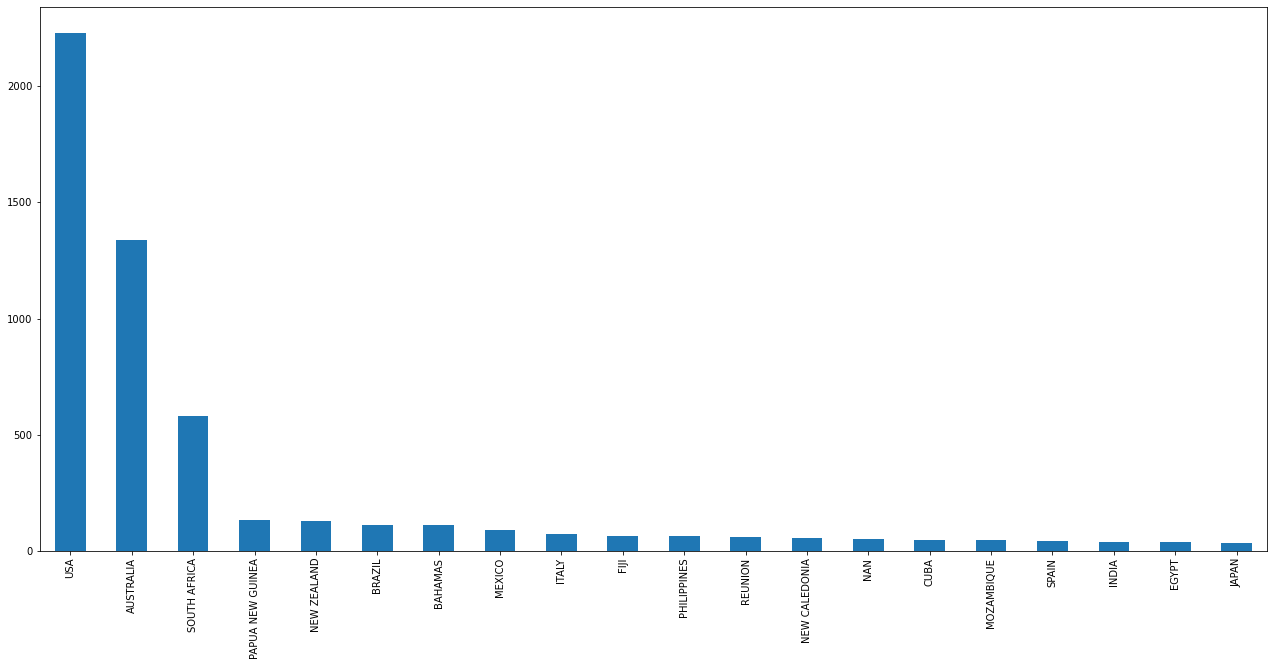

In [127]:
plt.figure(figsize=(22,10))
sharks.Country_Zone.value_counts()[:20].plot.bar();

## 2º Hipótesis.

#### Se quiere localizar en que tipo de actividad o practicando qué desporte acuático se han producido mayor número de ataques de tiburones. En primer lugar se observa descartando los valores desconocidos, se verifica que pescando ha sido cuando se han producido el mayot número de ataques.

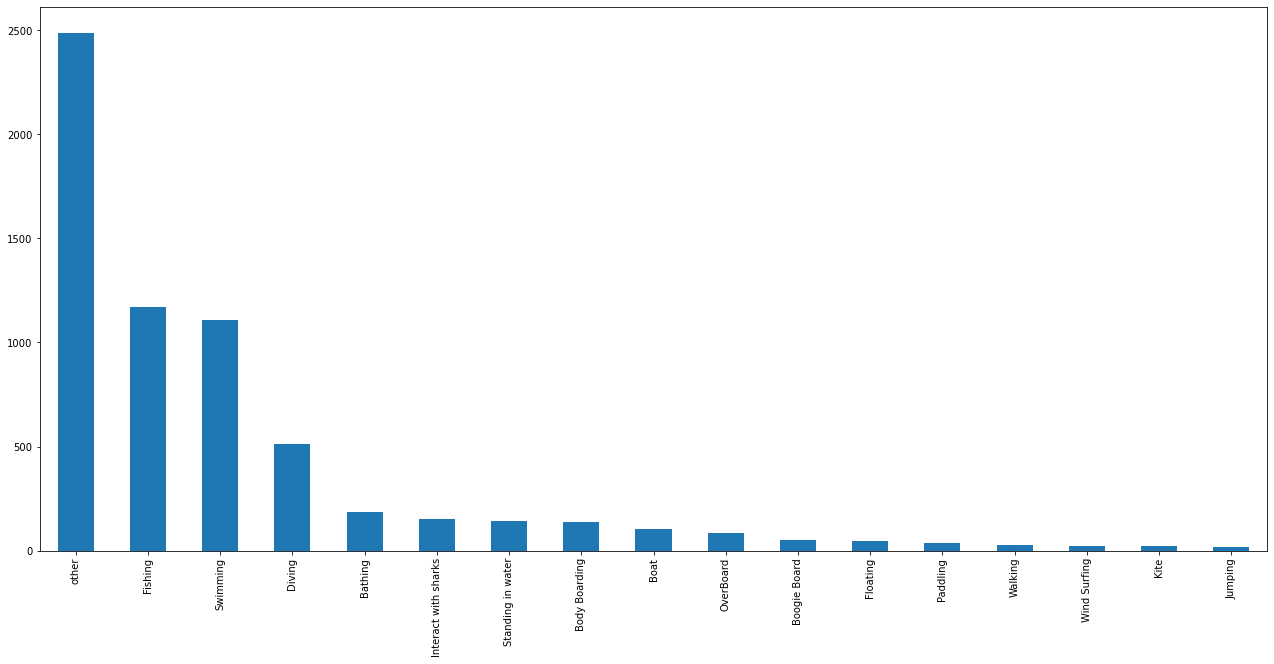

In [128]:
plt.figure(figsize=(22,10))
sharks.Activity.value_counts()[:20].plot.bar();

## 3º Hipótesis.

#### Se quiere verificar por rango de edad y sexo, quienes han recibido mayor número de ataques. Estos gráficos arrojan valores más altos en hombres que en mujeres en un rango de edad de unos 48 años.

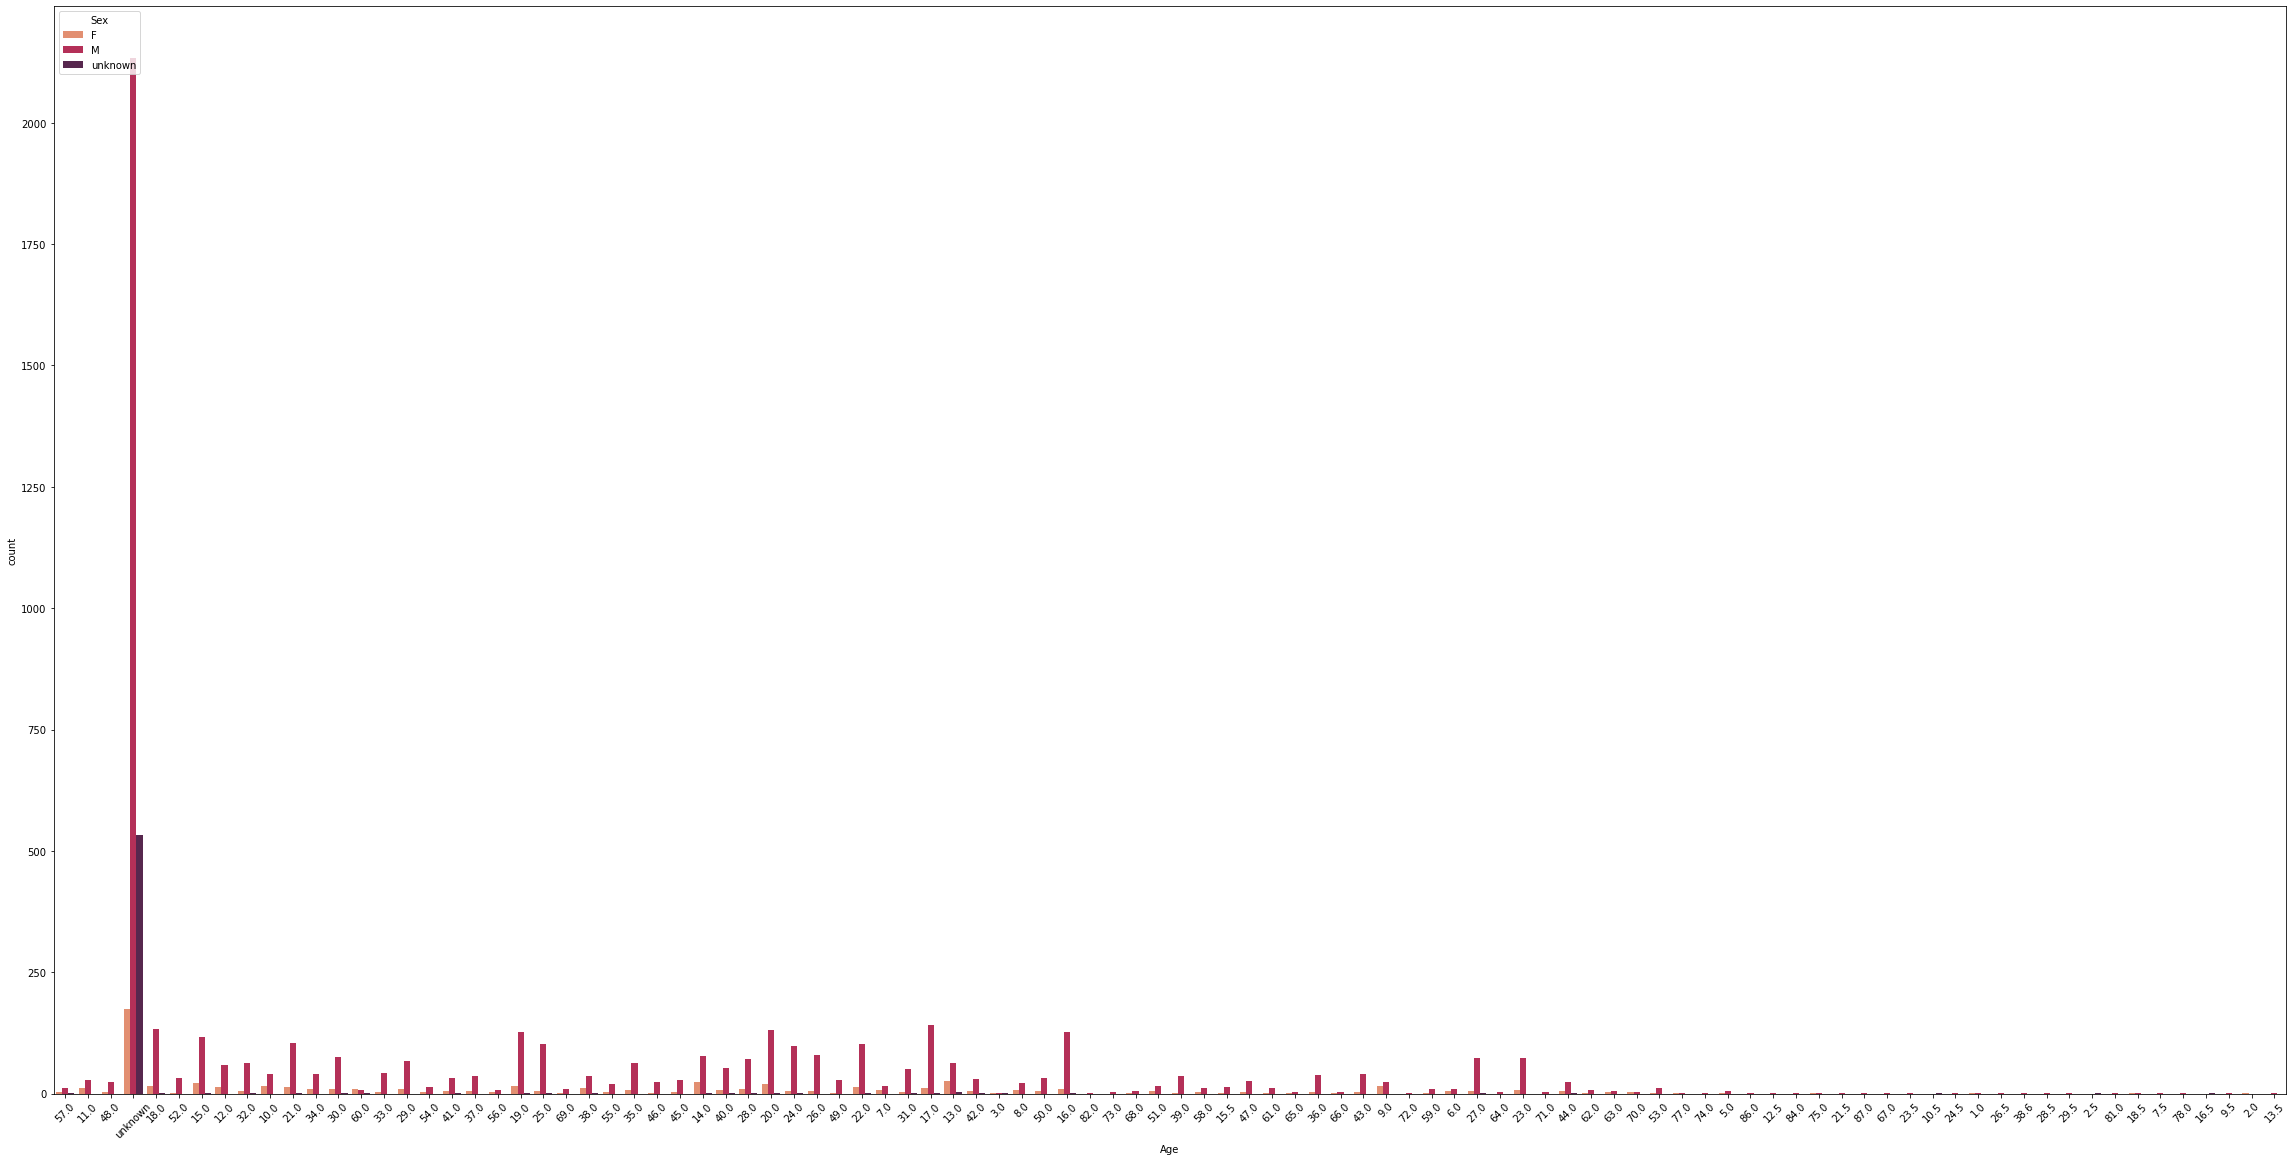

In [129]:
plt.figure(figsize=(40,20))


sns.countplot(x='Age', hue='Sex', data = sharks, palette="rocket_r")
plt.xticks(rotation=45);


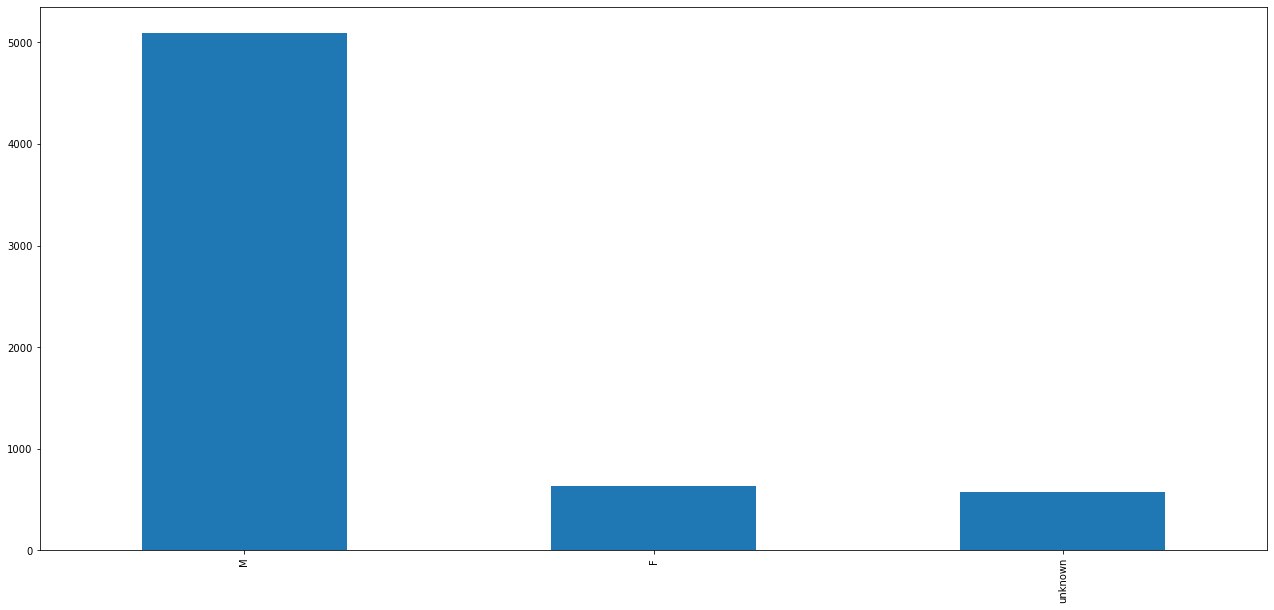

In [130]:
plt.figure(figsize=(22,10))
sharks.Sex.value_counts()[:20].plot.bar();